In [9]:
from pathlib import Path

root_img_dir = Path("/local/scratch/datasets/moth-wasp-snake/")
image_paths = []
for root, dirs, paths in root_img_dir.walk():
    for p in paths:
        image_paths.append(str(Path(root) / p))
        
image_paths = [x for x in image_paths if "Snake" in x]
image_paths

['/local/scratch/datasets/moth-wasp-snake/Snake1.png',
 '/local/scratch/datasets/moth-wasp-snake/Snake5.png',
 '/local/scratch/datasets/moth-wasp-snake/Snake2.png',
 '/local/scratch/datasets/moth-wasp-snake/Snake4.png',
 '/local/scratch/datasets/moth-wasp-snake/Snake3.png']

Processing Images: 100%|██████████| 5/5 [00:00<00:00, 29.86it/s]
Plotting PCA images: 5it [00:00, 61.18it/s]


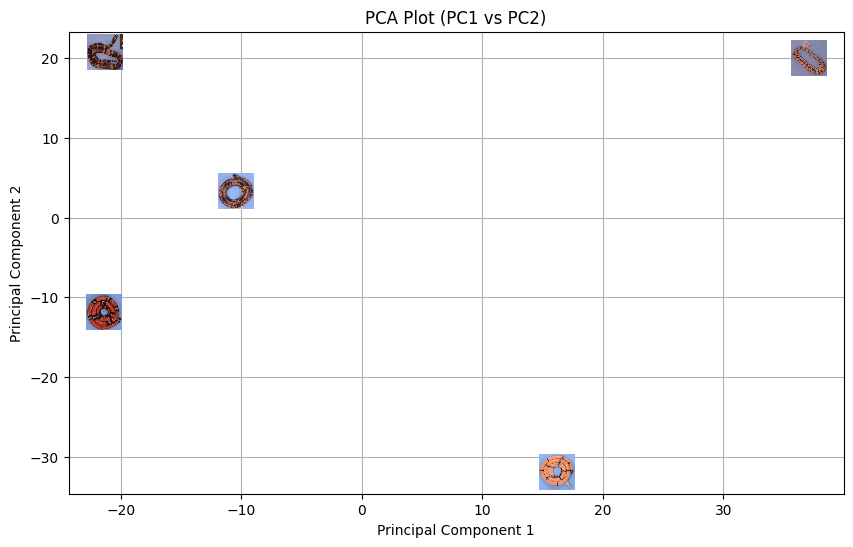

In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm

from mimicry_madness.viz import create_pca_image_plot
from mimicry_madness.models import DINOWrapper
from mimicry_madness.constants import HuggingfaceModelIDs

dino = DINOWrapper(HuggingfaceModelIDs.DINOv2).cuda()
dino.eval()

extracted_features = []
for img_path in tqdm(image_paths, desc="Processing Images"):
    img = Image.open(img_path).convert("RGB")
    img_pro = dino.process_image(img)
    with torch.no_grad():
        features = dino(img_pro.cuda())
    features = features.squeeze().cpu().numpy()
    extracted_features.append(features)

fig, ax = create_pca_image_plot(extracted_features, image_paths, pca_x=0, pca_y=1, plt_img_size=(256, 256), zoom=0.1)
plt.show()